<a href="https://colab.research.google.com/github/mabrandes/hello-world/blob/main/AML_Problem_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 8.1 - Sintering

Different models exist to predict the influence of porosity on the Young's Modulus of sintered parts. A simple model links the Young's Modulus $E$ to the porosity fraction $P$ by the empirical ratio $k$ :
\begin{equation}
	k = \frac{1- E'}{1 - \rho'}
\end{equation}
with $E' = E/E_K$ and $\rho' = \rho/\rho_K$. Index $_K$ are the compact material properties. The table below lists the material properties for two sintered Fe-based powders A and B.
	\begin{array}{l c c c}
		\text{Material} & k & \rho_K & E_K \\
		\hline
		\text{Material A} & 1.6 & 7.1~g/cm^3 & 170~GPa \\
		\text{Material B} & 6.7 & 7.25~g/cm^3 & 120~GPa\\
	\end{array}


To calculate the density from the porosity fraction $P$, the following formula can be used:
\begin{equation}
	P = \left( 1 - \frac{\rho}{\rho_K} \right)
\end{equation}

## a) Calculate Young's Modulus vs. porosity

Calculate the Young's Modulus for material A and B between 2 and 15 % porosity. Plot the results in dependency of porosity. What are the limitations of this simple model?

In [ ]:
## Load libraries
import math
import numpy as np
import matplotlib.pyplot as plt


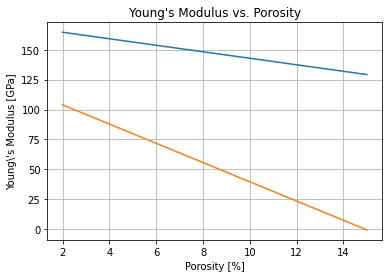

Young's Modulus for material B with 5% porosity is  79.80000000000001  GPa


In [ ]:
# Task 1a)


# k-value, density [g/cm^3], Young's Modulus [GPa]
mat_A = np.array([1.6, 7.1, 170])
mat_B = np.array([6.7, 7.25, 120])

# Porosity in %
porosity = np.linspace(2.0,15.0,100)


# Young's Modulus depending on the material parameters
E_mod_A = (1 - mat_A[0]*(porosity/100))*mat_A[2]
E_mod_B = (1 - mat_B[0]*(porosity/100))*mat_B[2]


# Plot of the results
fig_1a = plt.figure()
ax_1a = fig_1a.add_subplot(1, 1, 1)
ax_1a.plot(porosity, E_mod_A, color='tab:blue')
ax_1a.plot(porosity, E_mod_B, color='tab:orange')

ax_1a.set_xlabel('Porosity [%]')
ax_1a.set_ylabel(r'Young\'s Modulus [GPa]')
ax_1a.set_title('Young\'s Modulus vs. Porosity')
plt.grid(True)

plt.show()


# Young's Modulus at 5 % porosity for material B
E_mod_B_5perc = (1 - mat_B[0]*(5/100))*mat_B[2]
print("Young's Modulus for material B with 5% porosity is ", E_mod_B_5perc, " GPa")


### Solution

Young's Modulus equal to zero is not possible. The simple model is only valid in a certain range. Outside of this range, the dependency between porosity and Young's Modulus has to be nonlinear.

## b) Extrapolate data

Analyze the influence of the compression pressure during the sinter process on the mechanical properties for a material which was sintered for 30 min at 1120 °C. Calculate the empirical value $k$ ($E_K = 210~GPa$) and extrapolate the values for 0 MPa compression pressure. Assume a linear behavior.

\begin{array}{c c c c c c}
		\text{compression pressure} & \text{density} & \text{porosity} & \text{UTS} & \text{yield strength} & \text{Young's Modulus}\\
		\text{in MPa} & \text{in g/cm^3} & \text{in %} & \text{in MPa} & \text{in MPa} & \text{in GPa} \\
		\hline
		400 & 6.71 & 14.6 & 175 & 102 & 124\\
		500 & 6.95 & 11.6 & 210 & 125 & 145\\
		600 & 7.13 & 9.3 & 240 & 140 & 160\\
		700 & 7.25 & 7.8 & 255 & 145 & 167\\
		800 & 7.30 & 7.1 & 260 & 150 & 171\\
\end{array}

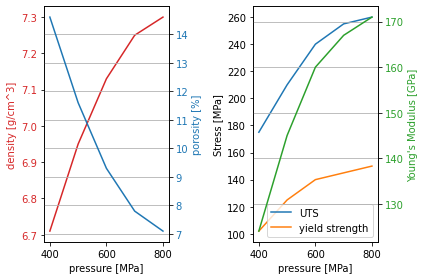

In [ ]:
## Task 1b)
#  Plot all data from table

#  You can solve this task by your own.

# Data from table
data = np.array([[400, 6.71, 14.6, 175, 102, 124],
    [500, 6.95, 11.6, 210, 125, 145],
    [600, 7.13, 9.3, 240, 140, 160],
    [700, 7.25, 7.8, 255, 145, 167],
    [800, 7.30, 7.1, 260, 150, 171]])

# Young's Modulus of compact material [GPa]
E_k = 210;


# Plot of linear behavior
fig_1c = plt.figure()

ax_1c_1 = fig_1c.add_subplot(1, 2, 1)

ax_1c_1.plot(data[:,0],data[:,1], label='density', color='tab:red')
ax_1c_1.set_xlabel('pressure [MPa]')
ax_1c_1.set_ylabel('density [g/cm^3]', color='tab:red')
ax_1c_1.tick_params(axis='y', labelcolor='tab:red')

ax_1c_1_2 = ax_1c_1.twinx()
ax_1c_1_2.set_ylabel('porosity [%]', color='tab:blue')
ax_1c_1_2.plot(data[:,0],data[:,2], label='porosity', color='tab:blue')
ax_1c_1_2.tick_params(axis='y', labelcolor='tab:blue')

plt.grid(True)


ax_1c_2 = fig_1c.add_subplot(1, 2, 2)

ax_1c_2.plot(data[:,0],data[:,3], label='UTS')
ax_1c_2.plot(data[:,0],data[:,4], label='yield strength')
ax_1c_2.set_xlabel('pressure [MPa]')
ax_1c_2.set_ylabel('Stress [MPa]')
ax_1c_2.legend()

ax_1c_2_2 = ax_1c_2.twinx()
ax_1c_2_2.plot(data[:,0],data[:,5], color='tab:green')
ax_1c_2_2.set_ylabel('Young\'s Modulus [GPa]', color='tab:green')
ax_1c_2_2.tick_params(axis='y', labelcolor='tab:green')

plt.grid(True)

fig_1c.tight_layout()
plt.show()


In [ ]:
## Task 1b) - Extrapolate data to 0 MPa compression pressure

# Import for linear regression
from sklearn.linear_model import LinearRegression

# Calculate relative density of compact material
rho_k = np.mean(data[:,1]/(1-data[:,2]/100))

# Calculate k-value
k = np.mean((1-(data[:,5]/E_k))/(1-(data[:,1]/rho_k)))
print('Average k-value is', round(k, 2))


# Start linear regression
x = data[:,0].reshape((-1, 1))

model = LinearRegression().fit(x,data[:,1:6])
# Only intersection with y-axis is of interest, as f(x=0)= b0 + b1*x = b0

print('Density at 0 MPa:', round(model.intercept_[0], 2), 'g/cm^3')
print('Porosity at 0 MPa:', round(model.intercept_[1], 2), '%')
print('UTS at 0 MPa:', round(model.intercept_[2], 2), 'MPa')
print('Yield strength at 0 MPa:', round(model.intercept_[3], 2), 'MPa')
print('Young\'s Modulus at 0 MPa:', round(model.intercept_[4], 2), 'GPa')

Average k-value is 2.66
Density at 0 MPa: 6.18 g/cm^3
Porosity at 0 MPa: 21.36 %
UTS at 0 MPa: 99.0 MPa
Yield strength at 0 MPa: 62.8 MPa
Young's Modulus at 0 MPa: 83.8 GPa


###Solution

The more pressure is applied during the sinter process the denser the material is. Therefore the values of UTS, yield strength and Young's Modulus increase.

The empirical value $k$ is $k = 2.66$ for the given material data.


\begin{array}{l l}
		\text{Density at 0 MPa}: & 6.18~g/cm^3\\
		\text{Porosity at 0 MPa}: & 21.36~\%\\
		\text{UTS at 0 MPa}: & 99.0~MPa\\
		\text{Yield strength at 0 MPa}: & 62.8~MPa\\
		\text{Young's Modulus at 0 MPa}: & 83.8~GPa\\
\end{array}


# Problem 8.2 - Coble’s model for densification

In Coble's model the densification rate is given by:

\begin{equation}
\frac{\text{d}\rho}{\text{d} t}=\frac{288D_l\gamma_s V_m}{R T G^3}
\end{equation}

We consider a grain growth controlled by surface diffusion, in which case the grain growth rate can be expressed as :

\begin{equation}
\frac{\text{d} G}{\text{d} t}=\frac{110D_s\delta_s\gamma_b V_m}{RTG^3}(1-\rho)^{-4/3}
\end{equation}


## Code for task a), b), c) & e) 

a) Plot the densification curves up to 0.98 relative density for an initial grain size of 4.0 $\mu m$  and 0.8 $\mu m$ for tungsten W at 3250 K and copper Cu at 1150 K. First complete the function below, than use it with the given input parameters. The corresponding material parameters are already implemented in this Python script.

b) Plot the corresponding grain size curve for task a).

c) How would the density and grain size evolve with an increase of the sintering time to 12 hours? Adjust max relative density for this.

e) What would be the relative density and grain size after 2.5 hours when the initial grain size is 15 $\mu m$ and 30 $\mu m$ for both materials? Try to adjust the sintering temperature to reach a relative density of 0.93 within 2.5 hours with an initial powder size of 30 $\mu m$. Be aware of the melting temperatures: $T_{M_{Cu}} = 1356~K$ and $T_{M_{W}} = 3683~K$.

In [ ]:
## Code for task 2: a), b), c) & e)
#  Define function to calculate density and grain size

# Input: temperature T in Kelvin, sintering time t_max in seconds, initial grain size in micrometer, material
def density(T, t_max, G, material):   
    # Material properties of Cupper and Tungsten       
    if material == 'Cu':
        D_l_0 = 6.2e-5        # D_0 for Lattice diffusion [m^2/s]
        Q_l = 208e3           # Activation energy for lattice diffusion [J/mol]
        D_s_0 = 2.0           # D_0 for surface diffusion [m^2/s]
        delta_s = 3.0e-10     # Effective surface thickness [m]
        Q_s = 205.2e3         # Activation energy for surface diffusion [J/mol]
        gamma_s = 1.720       # surface energy [J/m^2]
        gamma_b = 0.55        # grain boundary energy [J/m^2]
        V_m = 7.11e-6         # Molar volume [m^3/mol]
        
    elif material == 'W':
        D_l_0 = 5.6e-4        # D0 for Lattice diffusion [m^2/s]
        Q_l = 586e3           # Activation energy for lattice diffusion [J/mol]
        D_s_0 = 8.5e-4        # D_0 for surface diffusion [m^2/s]
        delta_s = 3.0e-10     # Effective surface thickness [m]
        Q_s = 326.6e3         # Activation energy for surface diffusion [J/mol]
        gamma_s = 2.650       # surface energy [J/m^2]
        gamma_b = 2.32        # grain boundary energy [J/m^2]
        V_m = 9.47e-6         # Molar volume [m^3/mol]
        
    else:
        print('Unknown material')
        return
  
    # Initalization
    R = 8.312       # gas constant [J/(K*mol)]
    rho = 0.9       # relative density
    Delta_t = 0.1   # time step
    d_G = 0         # initial grain growth rate
    d_rho = 0       # Initial densification rate
    
    # Calcualte diffusion coefficient as D = D_0*exp(-Q/(R*T))
    D_l = D_l_0*np.exp(-Q_l/(R*T))    # Lattice diffusion coefficient
    D_s = D_s_0*np.exp(-Q_s/(R*T))    # Surface diffusion coefficient
    
    # Initialization part 2
    t = 0
    i = 0
    nb_steps = int(t_max/Delta_t + 5)
    t_all = np.zeros(nb_steps)
    G_all = np.ones(nb_steps)*G
    rho_all = np.ones(nb_steps)*rho
    
    # While loop: True while time and relative density is smaller than given values
    while t<= t_max and rho <= 0.99:
        # Grain growth rate
        d_G = ((110*D_s*delta_s*gamma_b *V_m)/(R*T*(G**3))*((1-rho)**(-4/3)))
        # Update grain size
        G = G + d_G*Delta_t
        # Densification rate
        d_rho = (288*D_l*gamma_s*V_m)/(R*T*(G**3))
        # Update the relative density
        rho = rho + d_rho*Delta_t
        
        # Update variables
        t = t + Delta_t
        i = i + 1
        
        # Save data in arrays: time, grain size, relative density
        t_all[i] = t
        G_all[i] = G
        rho_all[i] = rho  
    
    
    t_all = t_all[0:i]
    G_all = G_all[0:i]
    rho_all = rho_all[0:i]


    return G_all, rho_all, t_all


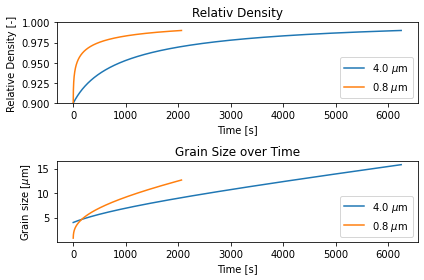

In [ ]:
## Code for task 2: a), b), c) & e)
#  Execute the function

# Define input for function 
T = 1150           # temperature in Kelvin
t_max = 12*60*60   # sintering time in seconds
material = 'Cu'     # Define material: either 'Cu' or 'W'


# Results for grain size 4.0 micro meter
G = 4.0e-6      # initial grain size in meter
[grain_40, rho_40, time_40] = density(T, t_max, G, material)

# Results for grain size 0.8 micro meter
G = 0.8e-6      # initial grain size in meter
[grain_08, rho_08, time_08] = density(T, t_max, G, material)



## Plot relative density and grain size

# Plot relative density data
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(time_40, rho_40, color='tab:blue')
ax1.plot(time_08, rho_08, color='tab:orange')

#ax1.set_xlim([0, t_max])
ax1.set_ylim([0.9, 1])

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Relative Density [-]')
ax1.set_title('Relativ Density')
ax1.legend([r'4.0 $\mu$m','0.8 $\mu$m'])


# Plot grain size data
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(time_40, grain_40*10**6, color='tab:blue')
ax2.plot(time_08, grain_08*10**6, color='tab:orange')

#ax2.set_xlim([0, t_max])
#ax2.set_ylim([0.9, 1])

ax2.set_xlabel('Time [s]')
ax2.set_ylabel(r'Grain size [$\mu$m]')
ax2.set_title('Grain Size over Time')
ax2.legend([r'4.0 $\mu$m','0.8 $\mu$m'])

fig.tight_layout()
plt.show()

### Solution

a) Run the script for the solution. Change between copper and tungsten.


b) Is included in the normal run of a)


c) Increase the sintering time to 12 h. Adjust the max relative density to higher a value in the while condition.


e) Grain size and relative density after 2.5 hours:
\begin{array}{c c c c}
		\text{Material} & \text{Initial grain size} & \text{Relative density} & \text{grain size}\\
		\hline
		\text{Copper} & 15~\mu m & 0.92 & 15.792~\mu m\\
		    & 30~\mu m & 0.903 & 30.09~\mu m\\
		\hline
		\text{Tungsten} & 15~\mu m & 0.9786 & 24.81~\mu m\\
		    & 30~\mu m & 0.918 & 31.0~\mu m\\
\end{array}
	
Copper (30 $\mu m$ powder size) reaches a relative density of 0.93 after 2.5 hours with a minimum sintering temperature of 1306 K and tungster needs a temperature of 3340 K.


# Problem 8.3 - Master Sintering Curves

The MSC are useful to predict the sintering profile needed to achieve a given density. To establish the MSC curve of a pre-alloyed NiTi powder, the powder was filled into a cylindrical die and sintered with an external pressure. Three densification experiments were made at a constant heating rate of 30, 40 and 50 °C/min, respectively. The specimen height was recorded during the experiments and the following MSC curve was obtained.

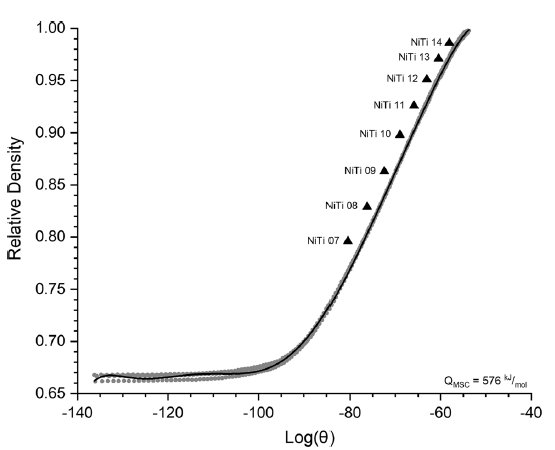

## d) Numerical integration for the relative density

What would be the relative density after heating from 225 to 850 °C at a constant rate of 60 K/min, followed by a 5 min holding time? Can the heating stage be neglected?

In [ ]:
## Task 3d)

from math import exp, log
from scipy.integrate import quad

# constants and parameters
R = 8.314       # universal gas constant
T0 = 225 + 273  # T0 temperature [K]
hrate = 60      # heating rate [K/min]
Q = 576e3       # activation energy [J/mol]
T = 850 + 273   # holding temperature [K]
thold = 5       # holding time [min]

# function we want to integrate numerically
def theta(t):
    return exp(-Q/R/(T0 + hrate*t))/(T0 + hrate*t)

# call quad to integrate theta from t1 to t2
t2 = (T - T0) / hrate
res, err = quad(theta, 0, t2) 

#add the isothermal holding to the result
res = res + 1/T*exp(-Q/R/T)*thold


print("Theta is {:g}"
    .format(res))


Theta is 7.60414e-30


In [ ]:
def rho(x):
    return  0.664 + (0.664 - 0.2785) / (1 + exp(-((log(x) + 67.96) / 9.157)))

density = rho(res)

print("The density is {:f}" 
        .format(density))


The density is 0.866332


### Solution

$\rho = 0.866$

Neglecting the heating stage leads to a similar $\rho$ so the heating stage could actually be neglected in that case. 